In [1]:
import numpy as np
import Triple_dynamics as Tr
import spin_models as spin
import matplotlib.pyplot as plt
from tqdm import tqdm
import Trip_utils as util

import Kickrateplots as kickplots
import merger_rate_calculate as mr

In [3]:
file_path = '/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/'
Nruns = 2
Tr_objects = [Tr.Tripledynamics(file_path) for _ in tqdm(range(Nruns), desc="Triple MBH instances being created...")]

/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:56: RuntimeWarning: divide by zero encountered in divide
  func = 1/dadt
/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:47: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  tau = integrate.quad(interp_func,a_triple_after,0)[0]
/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:56: RuntimeWarning: divide by zero encountered in divide
  func = 1/dadt
/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:47: IntegrationWarning: The maximum number of sub

In [41]:
import pickle

In [3]:
iso_bin = Tr.iso_binary()
weak_tr = Tr.weak_triples()

In [51]:
Tr_objects

In [52]:
with open('obj_data/tr.pkl', 'wb') as f:
    pickle.dump(Tr_objects, f, pickle.HIGHEST_PROTOCOL)

In [54]:
with open('obj_data/tr.pkl', 'rb') as f:
    new_iso_obj = pickle.load(f)

In [4]:
util.Trip_stats(Tr_objects)

Average prompt merger is 118.0 which is 22.69 %
Average merger after ejection is 183.0 which is 35.19 %
There are 219.00 no mergers on average which is 42.12%
Average total mergers is 301.0 which is 57.88 %
----------------------
Without triple interactions 210(40.4)% strong triple inner binary merges with just inspiral
With triple interactions added 301.0(57.9)% strong triple system has mergers which is a 17.5 % increase in mergers
101.5 (19.5%) strong triple induced mergers are otherwise non mergers under binary inspiral evolution.


In [5]:
util.ejection_effects(Tr_objects,weak_tr,iso_bin)

534(7.4 %)iso binary systems do not form as a result of prior random ejection events
84(5.6 %)weak triple systems do not form as a result of prior random ejection events
50(9.5 %)strong triple systems do not form as a result of prior random ejection events
668(7.23%) of all systems do not form due to prior ejection events
----------------
111(1.5 %)iso binary systems do not form as a result of prior hybrid ejection events
11(0.7 %)weak triple systems do not form as a result of prior hybrid ejection events
4(0.7 %)strong triple systems do not form as a result of prior hybrid ejection events
126(1.36%) of all systems do not form due to prior ejection events
----------------
6(0.1 %)iso binary systems do not form as a result of prior 5deg ejection events
1(0.1 %)weak triple systems do not form as a result of prior 5deg ejection events
0(0.0 %)strong triple systems do not form as a result of prior 5deg ejection events
7(0.08%) of all systems do not form due to prior ejection events
-------

In [6]:
merger_rates = [
   obj.total_merger_rate("all", zbinsize=0.2, zmax=7) for obj in tqdm(Tr_objects, desc="Calculating Merger Rates")
]
strong_triple_merger_rate = np.mean(merger_rates)

print(f"Total strong triple merger rate is : {strong_triple_merger_rate:.3f} yr^{-1}")

iso_bin_merger_rate = iso_bin.total_merger_rate(zbinsize=0.2, zmax=7)
weak_triples_merger_rate = weak_tr.total_merger_rate(zbinsize=0.2, zmax=7)
total_merger_rate = strong_triple_merger_rate+iso_bin_merger_rate+weak_triples_merger_rate

print(f"Merger rate considering only isolated binaries is {iso_bin_merger_rate:.2f} yr^-1")
print(f"Total merger rate including strong and weak triples is {total_merger_rate:.3f} yr^-1")
print(f"Merger rate of weak triples is {weak_triples_merger_rate:.3f} yr^-1")

print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")

Calculating Merger Rates:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating Merger Rates: 100%|██████████| 2/2 [00:00<00:00, 26.48it/s]

Total strong triple merger rate is : 0.018 yr^-1


Merger rate considering only isolated binaries is 0.37 yr^-1
Total merger rate including strong and weak triples is 0.402 yr^-1
Merger rate of weak triples is 0.017 yr^-1
Merger rate increases from 0.37 to 0.38 which is 5.0 % increase when we add strong triples 
After adding both strong and weak triples the merger rate is 0.40 which is a 9.8 % increase


In [99]:
z_triple_inspiral = Tr_objects[0].z_triple_merger[Tr_objects[0].bin_merger_flag=="Yes"]
print(f"The merger rate for strong triples under isnpiral evolution (without considering strong interaction) is {mr.merger_rate_find(z_triple_inspiral,zbinsize=0.2, zmax=7):.4f} yr^{-1}")

The merger rate files are saved at /Users/pranavsatheesh/Triples/Github/Illustris_Data/


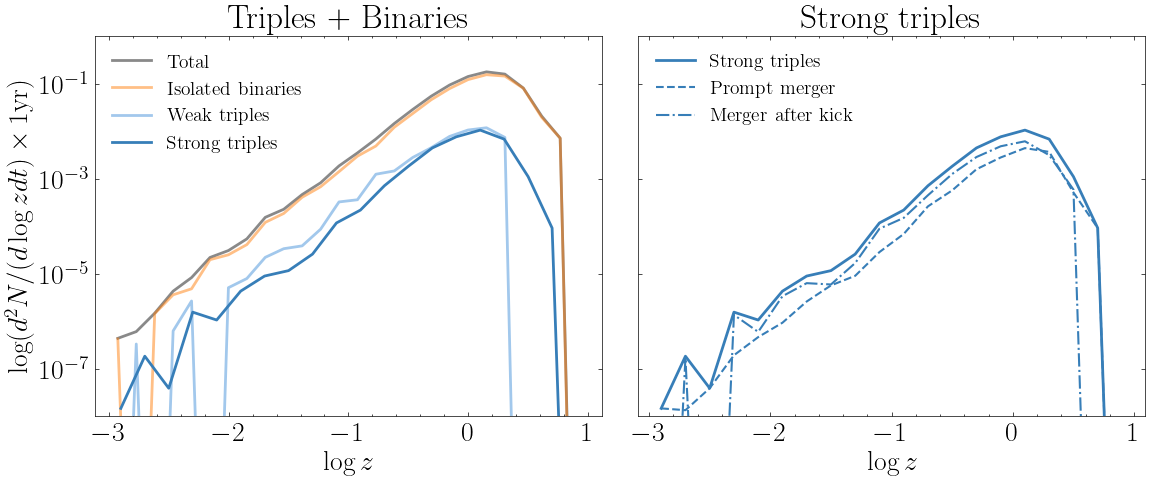

In [26]:
fig,axes = Tr.plot_merger_rates(Tr_objects,weak_tr,iso_bin,Nruns)
axes[1].set_ylabel("")
fig.tight_layout()
axes[1].set_title("Strong triples")
axes[0].set_title("Triples + Binaries")
fig.savefig(f"Figures/Merger_rate_total_N_{Nruns:d}.pdf")

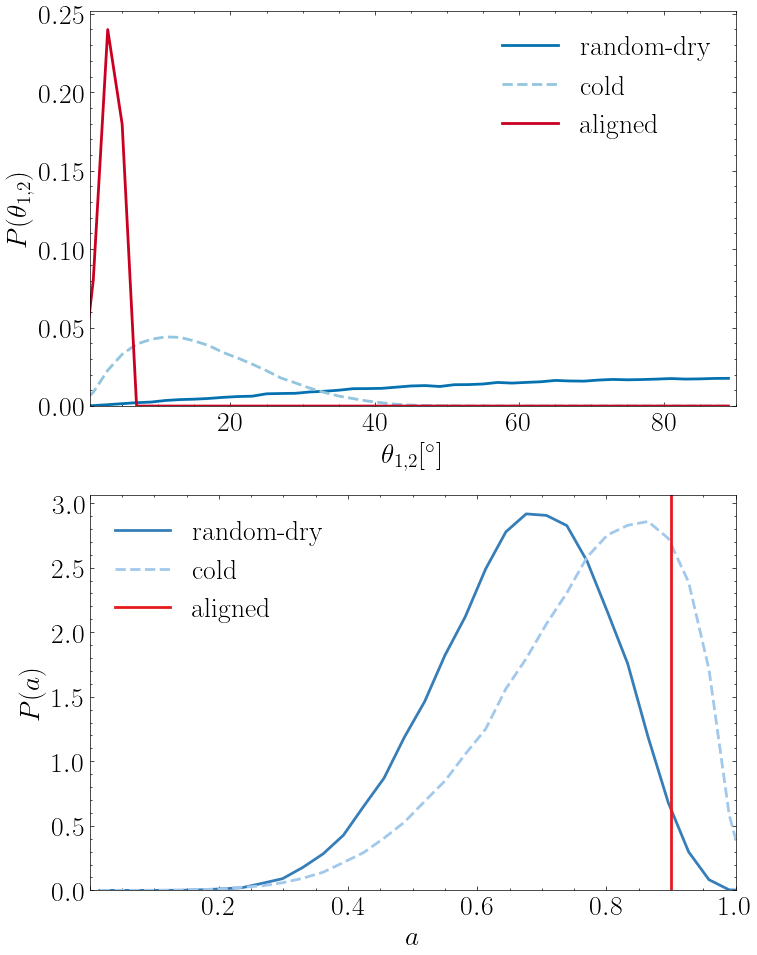

In [148]:
fig,axes = kickplots.plot_spin_dist()
axes[0].xaxis.label.set_fontsize(20)
axes[0].yaxis.label.set_fontsize(20)
axes[1].xaxis.label.set_fontsize(20)
axes[1].yaxis.label.set_fontsize(20)
axes[0].legend(labels=["random-dry","cold","aligned"],fontsize=20)
axes[1].legend(labels=["random-dry","cold","aligned"],fontsize=20)
fig.savefig("Figures/spin-models-magnitude-and-angle.pdf")

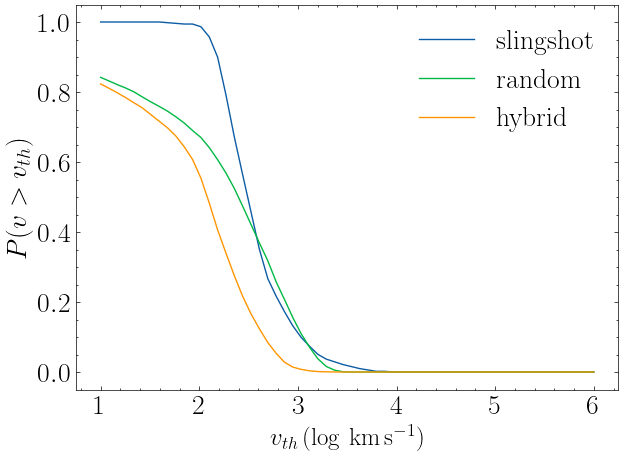

In [66]:
vmax = 6
vbinsize = 1
sling_v = [kick for kick in Tr_objects[0].slingshot_kicks if kick > 0]
sling_v = np.array(sling_v)

rand_v_iso = [kick for kick in iso_bin.gw_kick_random if kick > 0]
rand_v_weak = [kick for kick in weak_tr.gw_kick_random if kick > 0]
rand_v_strong = [kick for kick in Tr_objects[0].gw_kick_random if kick > 0]
rand_v = np.concatenate((rand_v_strong,rand_v_iso,rand_v_weak))
rand_v = np.array(rand_v)


hybrid_v_strong = [kick for kick in Tr_objects[0].gw_kick_hybrid if kick > 0]
hybrid_v_weak = [kick for kick in weak_tr.gw_kick_hybrid if kick > 0]
hybrid_v_iso = [kick for kick in iso_bin.gw_kick_hybrid if kick > 0]
hybrid_v = np.concatenate((hybrid_v_strong,hybrid_v_iso,hybrid_v_weak))
hybrid_v = np.array(hybrid_v)

vth_values = np.logspace(1,6,60)

sling_p = [(sling_v > vth).sum() / len(sling_v) for vth in vth_values]
rand_p = [(rand_v > vth).sum() / len(rand_v) for vth in vth_values]
hybrid_p = [(hybrid_v > vth).sum() / len(hybrid_v) for vth in vth_values]

plt.figure(figsize=(7,5))
plt.plot(np.log10(vth_values),sling_p,label="slingshot")
plt.plot(np.log10(vth_values),rand_p,label="random")
plt.plot(np.log10(vth_values),hybrid_p,label="hybrid")

plt.xlabel(r"$v_{th} \, (\log \, \text{km} \, \text{s}^{-1}$)",fontsize=18)
plt.ylabel('$P(v > v_{th})$')
plt.legend()

Fraction of sling velocity abover 600 km/s is 22.34 %
Fraction of random velocity abover 600 km/s is 26.18 %
Fraction of hybrid velocity abover 600 km/s is 5.26 %
Fraction of aligned velocity abover 600 km/s is 0.01 %
--------
The maximum sling kick is 8149.61 km/s
The minimum sling kick is 77.60 km/s
--------
The maximum random kick is 3336.38 km/s
The minimum random kick is 0.00 km/s
--------
The maximum hybrid kick is 3392.85 km/s
The maximum aligned kick is 610.70 km/s


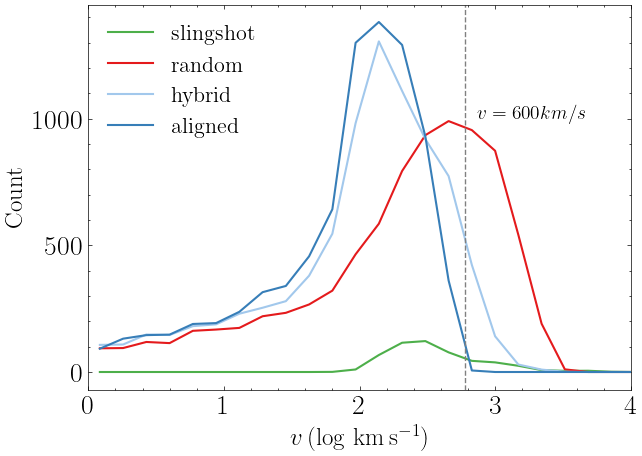

In [5]:
# kick distribution plot
fig,ax = kickplots.kick_velocity_dist_plot(Tr_objects,weak_tr,iso_bin,Nruns)
#ax.set_xlim(0,4)
#ax.text(np.log10(600)+0.09,1000,'$v = 600 km/s$',fontsize=12)
#fig.savefig("Figures/kick_velocity_dist.pdf")

In [14]:
sling_esc = []
rand_esc = []
hybrid_esc = []
deg5_esc = []

for i in range(Nruns):
    sling_esc.append(np.sum(Tr_objects[i].slingshot_kicks>Tr_objects[i].Vescape))
    rand_esc.append(np.sum(Tr_objects[i].gw_kick_random>Tr_objects[i].Vescape))
    hybrid_esc.append(np.sum(Tr_objects[i].gw_kick_hybrid>Tr_objects[i].Vescape))
    deg5_esc.append(np.sum(Tr_objects[i].gw_kick_5deg>Tr_objects[i].Vescape))

In [15]:
print("Out of 520 strong triples...")
print(f"{np.mean(sling_esc)/520 * 100:.2f}% of them have slingshot kicks greater than Vesc")
print(f"{np.mean(rand_esc)/520 * 100:.2f}% of them have GW-random kicks greater than Vesc")
print(f"{np.mean(hybrid_esc)/520 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print(f"{np.mean(deg5_esc)/520 * 100:.2f}% of them have GW-aligned kicks greater than Vesc")

Out of 520 strong triples...
8.71% of them have slingshot kicks greater than Vesc
9.24% of them have GW-random kicks greater than Vesc
0.86% of them have GW-hybrid kicks greater than Vesc
0.06% of them have GW-aligned kicks greater than Vesc


In [16]:
print("Out of 9234 systems...")

print(f"{(np.mean(rand_esc)+np.sum(iso_bin.gw_kick_random>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_random>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-random kicks greater than Vesc")
print(f"{(np.mean(hybrid_esc)+np.sum(iso_bin.gw_kick_hybrid>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_hybrid>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print(f"{(np.mean(deg5_esc)+np.sum(iso_bin.gw_kick_5deg>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_5deg>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print("%2.3f %% have slingshot kicks above Vesc"%(np.mean(sling_esc)/9234 * 100))

Out of 9234 systems...
13.36% of them have GW-random kicks greater than Vesc
1.50% of them have GW-hybrid kicks greater than Vesc
0.13% of them have GW-hybrid kicks greater than Vesc
0.491 % have slingshot kicks above Vesc


In [80]:
np.sum(weak_tr.z_merger>=2)+np.sum((Tr_objects[0].z_triple_merger>=2)&(Tr_objects[0].gw_kick_random>Tr_objects[0].Vescape))+np.sum((Tr_objects[0].z_triple_merger>=2)&(Tr_objects[0].slingshot_kicks>Tr_objects[0].Vescape))

10

In [76]:
np.sum((iso_bin.gw_kick_random>iso_bin.Vescape)&(iso_bin.z_merger>=2))/np.sum(iso_bin.z_merger>=2)*100

22.811671087533156

In [77]:
np.sum((iso_bin.gw_kick_hybrid>iso_bin.Vescape)&(iso_bin.z_merger>=2))/np.sum(iso_bin.z_merger>=2)*100

2.6525198938992043

In [136]:
sling_kick = np.array(Tr_objects[0].slingshot_kicks)
idx_list = np.argwhere(sling_kick>3000)
print(idx_list,sling_kick[idx_list])

[[ 73]
 [121]
 [204]
 [251]
 [368]
 [387]
 [500]
 [505]
 [513]] [[8149.60950786]
 [5848.6489077 ]
 [4216.9872105 ]
 [4467.76608711]
 [3821.6765455 ]
 [3709.37162828]
 [5761.44438638]
 [3324.03739627]
 [4806.65030799]]


In [126]:
print(Tr_objects[1].M1[251]/1e8,Tr_objects[1].M2[251]/1e8,Tr_objects[1].M3[251]/1e8)

2.7212176063613813 0.12255488321097117 1.4405383795755424


In [114]:
for i in idx_list:
   print(Tr_objects[1].merger_flags[i[0]],Tr_objects[1].slingshot_kicks[i[0]]) 


Tr-ej 8149.609507864921
Tr-ej 5848.648907702146
Tr-ej 4216.987210496302
Tr 4467.766087114535
Tr-ej 3821.676545499206
Tr-ej 3709.371628276844
Tr 5761.444386379467
Tr-ej 3324.037396267112
No 4806.650307991909


In [115]:
for i in idx_list:
   print(Tr_objects[2].merger_flags[i[0]],Tr_objects[2].slingshot_kicks[i[0]]) 

Tr-ej 8149.609507864921
Tr-ej 5848.648907702146
Tr-ej 4216.987210496302
Tr-ej 4467.766087114535
Tr 3821.676545499206
Tr-ej 3709.371628276844
Tr-ej 5761.444386379467
Tr-ej 3324.037396267112
No 4806.650307991909


In [94]:
Tr_objects[1].merger_flags[121]

'Tr-ej'

In [88]:
Tr_objects[1].M1[73]/1e8

7.188565127739446

In [87]:
Tr_objects[1].M2[73]/1e8

3.832382775344781

In [86]:
Tr_objects[1].M3[73]/1e7

1.2675811878682541

In [80]:
print(dir(Tr_objects[1]))

['M1', 'M1_ill', 'M2', 'M2_ill', 'M3', 'M3_ill', 'N_strong_triples', 'Vescape', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a_2nd_ovtks', 'a_triple_after', 'a_triple_ovtks_ill', 'bhid1', 'bhid2', 'bhid3', 'bhid4', 'bin_merger_flag', 'diff_merger_Rate_for_plot', 'escape_rate_for_plot', 'f_gas', 'gw_kick_5deg', 'gw_kick_hybrid', 'gw_kick_random', 'interpolate_with_bonetti', 'merger_after_ejection', 'merger_after_ejection_mask', 'merger_flags', 'merger_mask', 'no_merger', 'no_merger_mask', 'prompt_merger', 'prompt_merger_mask', 'qin', 'qin_ill', 'qout', 'qout_ill', 'slingshot_kicks', 'strong_triples_file_path', 't_triple_form', 'total_merger_rate', 'triple_mergers_times', 'z_form', 'z_triple_m

In [61]:
[kick for kick in Tr_objects[0].slingshot_kicks if kick > 3000]

[8149.609507864921,
 5848.648907702146,
 4216.987210496302,
 4467.766087114535,
 3821.676545499206,
 3709.371628276844,
 5761.444386379467,
 3324.037396267112,
 4806.650307991909]

In [133]:
[kick for kick in Tr_objects[45].slingshot_kicks if kick > 3000]

[8149.609507864921,
 5848.648907702146,
 4216.987210496302,
 4467.766087114535,
 3821.676545499206,
 3709.371628276844,
 5761.444386379467,
 3324.037396267112]

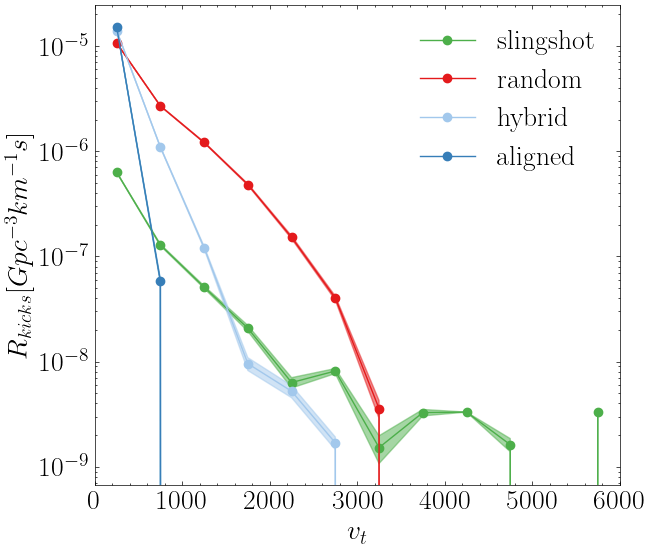

(1e-10, 2.4543821795213302e-05)

In [138]:
# GW kick rate plot
fig,ax = kickplots.plot_rate_kicks(Tr_objects,weak_tr,iso_bin,v_max=6000,vbin_size=500,Nruns=Nruns)
ax.set_ylim(1e-10,)
#fig.savefig("Figures/kick_rates_for_spins.pdf")

In [21]:
print(f"Total number of mergers in 9234 is {np.sum(iso_bin.z_merger>0)+np.sum(weak_tr.z_merger>0)+np.sum(Tr_objects[0].z_triple_merger>0):d}")
iso_inv,weak_inv,strong_inv = Tr.find_invalid_mergers(Tr_objects[0],weak_tr,iso_bin,"random")
iso_inv,weak_inv,strong_inv = Tr.find_invalid_mergers(Tr_objects[0],weak_tr,iso_bin,"5deg")

Total number of mergers in 9234 is 4554


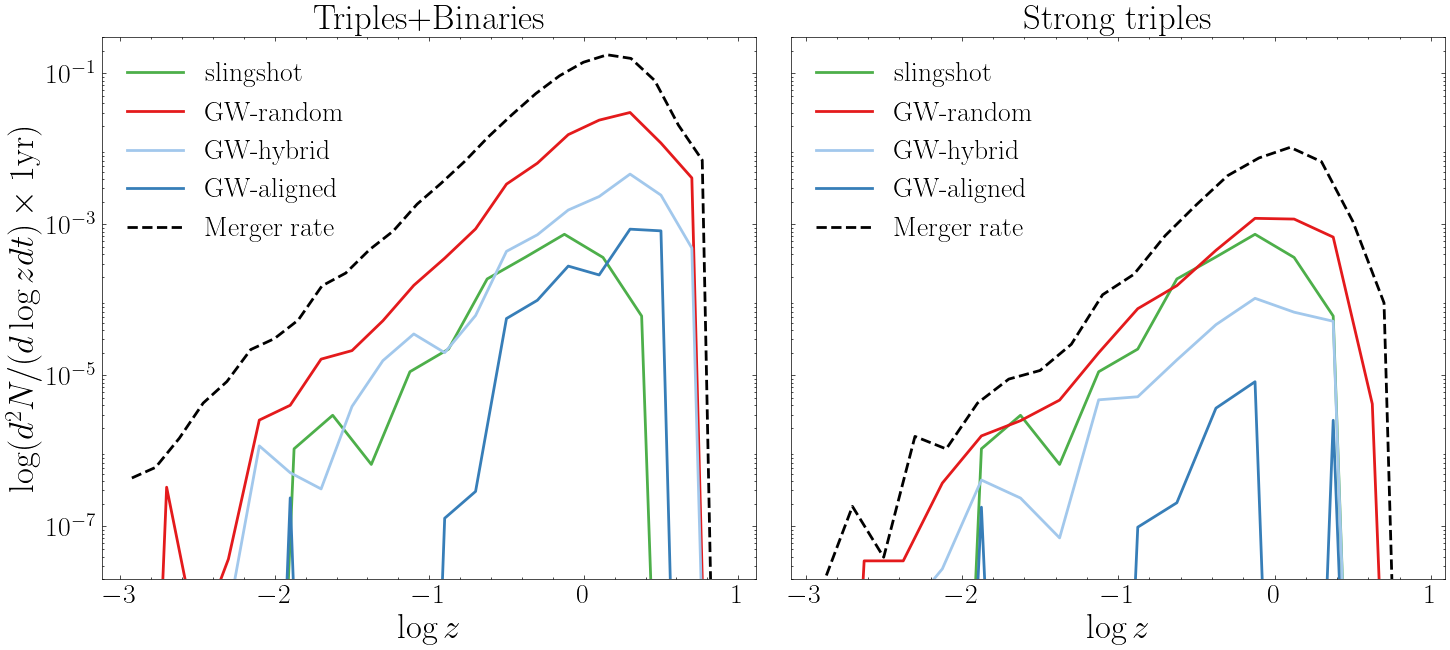

In [22]:
fig,ax = Tr.plot_ejection_rates(Tr_objects,weak_tr,iso_bin,Nruns)
fig.savefig(f"Figures/ejection_rates_all_and_triples_{Nruns:d}.pdf")

In [59]:
VbyVesc = np.log10(iso_bin.gw_kick_random/iso_bin.Vescape)

(-2.0, 1.0)

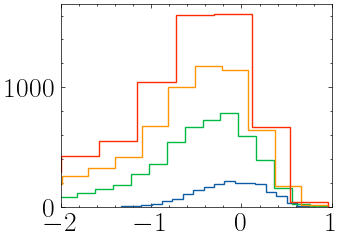

In [73]:
plt.hist(VbyVesc[iso_bin.M1+iso_bin.M2<1e7],histtype="step",bins=20)
plt.hist(VbyVesc[(iso_bin.M1+iso_bin.M2<1e8)],histtype="step",bins=20)
plt.hist(VbyVesc[(iso_bin.M1+iso_bin.M2<1e9)],histtype="step",bins=20)
plt.hist(VbyVesc[iso_bin.M1+iso_bin.M2>1e6],histtype="step",bins=20)
plt.xlim(-2,1)

(array([0.02230254, 0.09416629, 0.16603004, 0.24037184, 0.17346422,
        0.17594228, 0.11151271, 0.13133719, 0.13877137, 0.0371709 ]),
 array([-7.47582996, -6.70127824, -5.92672653, -5.15217482, -4.3776231 ,
        -3.60307139, -2.82851968, -2.05396796, -1.27941625, -0.50486454,
         0.26968718]),
 [<matplotlib.patches.Polygon at 0x16b2250c0>])

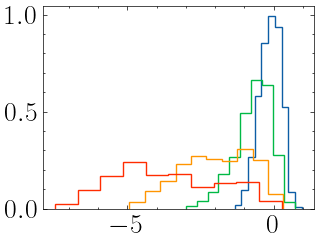

In [61]:
plt.hist(VbyVesc[iso_bin.M1+iso_bin.M2<1e7],histtype="step",bins=10,density=True)
plt.hist(VbyVesc[(iso_bin.M1+iso_bin.M2>1e7)&(iso_bin.M1+iso_bin.M2<1e8)],histtype="step",bins=10,density=True)
plt.hist(VbyVesc[(iso_bin.M1+iso_bin.M2<1e9)&(iso_bin.M1+iso_bin.M2>1e8)],histtype="step",bins=10,density=True)
plt.hist(VbyVesc[iso_bin.M1+iso_bin.M2>1e9],histtype="step",bins=10,density=True)

### Time delay between galaxy merger and MBHB merger

In [4]:
t_galaxy_merger_iso = iso_bin.t_form[iso_bin.merger_flag=="Yes"]
t_MBHB_merger_iso = iso_bin.t_merger[iso_bin.merger_flag=="Yes"]
Deltat_iso = t_MBHB_merger_iso-t_galaxy_merger_iso

In [22]:
t_galaxy_merger_iso

array([8.57200299e+08, 8.91102831e+08, 9.03275458e+08, ...,
       1.33741583e+10, 1.33973023e+10, 1.34772538e+10])

In [21]:
t_MBHB_merger_iso

array([8.58586713e+08, 8.92421436e+08, 3.83359907e+09, ...,
       1.37549837e+10, 1.33996315e+10, 1.35962922e+10])

In [23]:
Deltat_iso

array([1.38641454e+06, 1.31860485e+06, 2.93032361e+09, ...,
       3.80825376e+08, 2.32919498e+06, 1.19038346e+08])

In [12]:
np.median(Deltat_iso)/1e9

1.3652376507959079

In [5]:
#t_galaxy_merger_strong_triple = Tr_objects[0].t_triple_form[Tr_objects[0].merger_mask]
t_galaxy_merger_strong_triple = Tr_objects[0].t_form2[Tr_objects[0].merger_mask]
t_MBHB_strong_triple = Tr_objects[0].triple_mergers_times[Tr_objects[0].merger_mask]
Deltat_strong_triple = t_MBHB_strong_triple-t_galaxy_merger_strong_triple

In [14]:
t_galaxy_merger_strong_triple = Tr_objects[0].t_form2[Tr_objects[0].prompt_merger_mask]
t_MBHB_strong_triple = Tr_objects[0].triple_mergers_times[Tr_objects[0].prompt_merger_mask]
Deltat_strong_triple = t_MBHB_strong_triple-t_galaxy_merger_strong_triple

In [68]:
np.median(Deltat_strong_triple)/1e9

0.9453159208043866

(array([ 2.,  1.,  1.,  4., 34., 64., 71., 56., 36., 21.]),
 array([6.14005045, 6.52144759, 6.90284473, 7.28424187, 7.66563901,
        8.04703615, 8.42843329, 8.80983043, 9.19122757, 9.57262471,
        9.95402185]),
 <BarContainer object of 10 artists>)

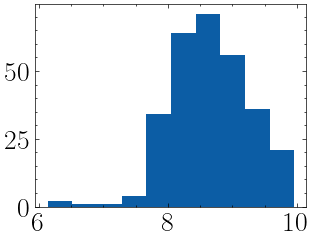

In [9]:
plt.hist(np.log10(t_MBHB_strong_triple-Tr_objects[0].t_triple_form[Tr_objects[0].merger_mask]))

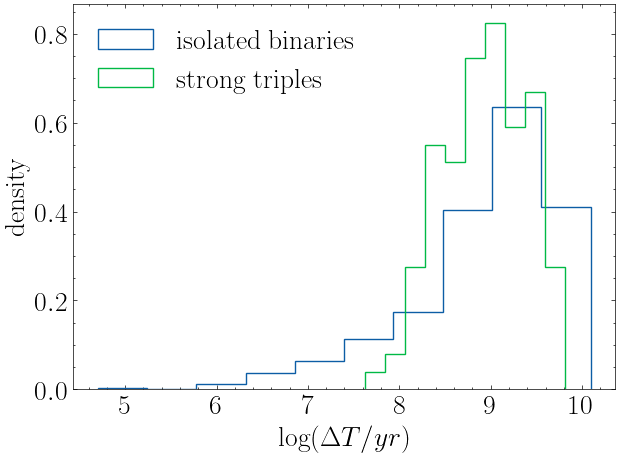

In [24]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.hist(np.log10(Deltat_iso),histtype="step",label="isolated binaries",density=True)
ax.hist(np.log10(Deltat_strong_triple),histtype="step",label="strong triples",density=True)
#ax.hist(np.log10(t_galaxy_merger_iso),histtype="step",density=True)
ax.set_ylabel("density")
ax.set_xlabel("$\log(\Delta T/yr)$")
ax.legend(loc="upper left")